In [18]:
import pandas as pd
import numpy as np
from sklearn import *
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz as g

from sklearn.metrics import accuracy_score
import warnings 
warnings.simplefilter('ignore')

In [19]:
malware_dataset = pd.read_csv('datasets/MalwareArtifacts2.csv', delimiter=',')
# Extacting artifacts samples fields "AddressOfEntryPoint" and "DllCharacteristics"
samples = malware_dataset.iloc[:, [0, 4]].values
targets = malware_dataset.iloc[:, 8].values

In [20]:
from sklearn.model_selection import train_test_split

training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.2, random_state=0)

In [21]:
print(training_samples.shape,testing_samples.shape, training_targets.shape, testing_targets.shape )

(8, 2) (2, 2) (8,) (2,)


In [22]:
from sklearn import tree
tree_classifier = tree.DecisionTreeClassifier()

In [23]:
tree_classifier.fit(training_samples, training_targets)

DecisionTreeClassifier()

In [24]:
predictions = tree_classifier.predict(testing_samples)

In [25]:
accuracy = 100.0 * accuracy_score(testing_targets, predictions)
print ("Decision Tree accuracy: " + str(accuracy))

Decision Tree accuracy: 100.0


In [26]:
rfc =  ensemble.RandomForestClassifier(n_estimators=50) 
rfc.fit(training_samples, training_targets)
accuracy = rfc.score(testing_samples, testing_targets)
print("Random Forest Classifier accuracy: " + str(accuracy*100) )

Random Forest Classifier accuracy: 100.0


In [27]:
text_tree = tree.export_text(tree_classifier)
print(text_tree)

|--- feature_1 <= 16544.00
|   |--- class: 0
|--- feature_1 >  16544.00
|   |--- class: 1



In [28]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [29]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [30]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(text_tree, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got '|--- feature_1 <= 16544.00\n|   |--- class: 0\n|--- feature_1 >  16544.00\n|   |--- class: 1\n' instead.

<Figure size 2500x2000 with 0 Axes>

In [32]:
# fig.savefig("decistion_tree.png")

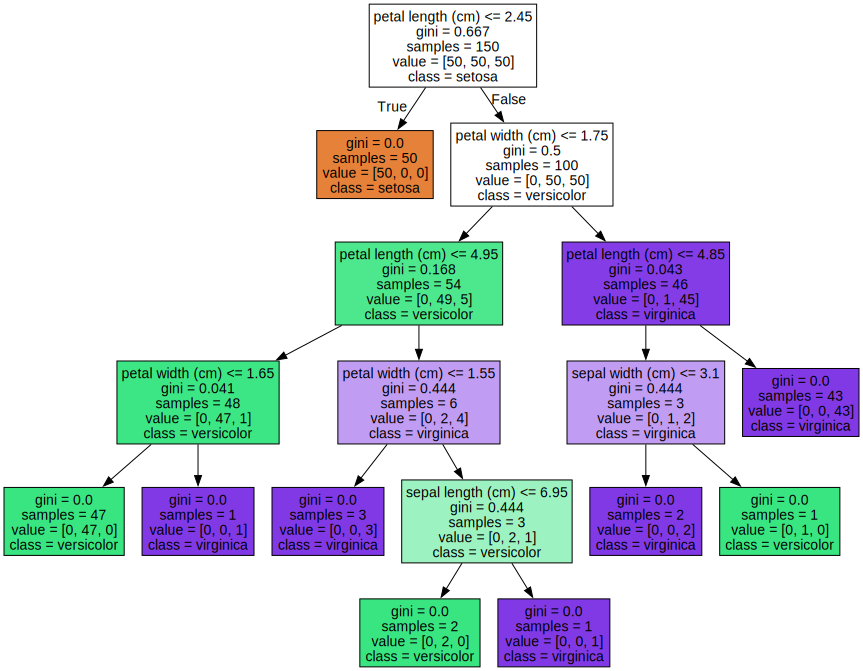

In [33]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = g.Source(dot_data, format="png") 
graph

In [34]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'